In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data:

In [110]:
df = pd.read_csv('./Cleaned data/Retailer_A_phones.csv')

In [111]:
df.head(10)

,Product_Name,Price,Rating,Color,Memory_GB
0,Xiaomi Redmi Note 9 Pro,252.0,4.9,interstellar grey,128
1,Xiaomi Redmi Note 9 Pro,249.0,4.8,green,128
2,Huawei P40 Lite,199.0,4.6,midnight black,128
3,Xiaomi Redmi Note 9 Pro,239.0,5,white,128
4,Samsung Galaxy M31s,317.0,5,mirage black,128
5,Xiaomi Redmi 9,149.5,5,carbon grey,64
6,Apple iPhone 7 32GB,249.0,-,-,-
7,Xiaomi Redmi Note 9,175.0,4.5,green,128
8,Xiaomi Redmi 9C,118.51,-,twilight blue,32
9,Sony Xperia 5 II,889.0,-,blue,128


# Augment data with additional information:

In [112]:
df['Brand'] = df.Product_Name.apply(lambda x: x.strip().split(' ')[0])

Modifying type of some columns for later calculations:

In [113]:
def price_as_float(s):
    if s != '-':
        return float(s)
    else:
        return s    

In [114]:
df.Price = df.Price.apply(lambda x: price_as_float(x))

In [115]:
df.Rating = df.Rating.apply(lambda x: price_as_float(x))

# Analyse the data:

### Question 1: What brands of phones this retailer sells?

Pandas series with all the brand names that this retailer sells:

In [116]:
df.Brand.value_counts()

Apple          131
Samsung        111
Xiaomi         106
Huawei          82
Sony            35
Blackview       28
MyPhone         27
Realme          26
Oukitel         26
Nokia           24
LG              24
OnePlus         17
Meizu           17
Motorola        16
Alcatel         13
myPhone         12
Oppo            12
Allview         12
Honor           11
iPhone          10
Denver          10
Ulefone         10
ZTE              8
UleFone          7
Blaupunkt        7
Prestigio        6
Energizer        6
Cubot            5
Google           5
CAT              5
TECNO            4
RugGear          3
HONOR            2
Kruger&Matz      2
Kruger           2
Nuu              2
Doogee           2
MEIZU            1
Gigaset          1
Iphone           1
Itel             1
Sharp            1
Evelatus         1
Beafon           1
Maxcom           1
Getnord          1
SONY             1
Cat              1
Prestigo         1
Lenovo           1
Name: Brand, dtype: int64

In [117]:
df.Brand = df.Brand.apply(lambda x: x.lower().replace('iphone', 'Apple'))

### Question 2: Which brands are most expensive in general, and which ones are the cheapest ones?

One of the problems is, that not all the products has a specified price. So for further analysis, products with no valid pricing will be droped down.

In [118]:
n_priceless = len(df[df.Price == '-'])
n_items = len(df)
print("{} items has no price. That's about {} % of all items in store ({}).".format(n_priceless,
                                                                       round((n_priceless / n_items)*100),
                                                                        n_items))

291 items has no price. That's about 35 % of all items in store (839).


In [119]:
pr_df = df.drop(df[df.Price == '-'].index, axis=0)
print(df.shape, pr_df.shape)

(839, 6) (548, 6)


In [120]:
pr_df.Brand = pr_df.Brand.apply(lambda x: x.lower())

In [121]:
pr_df.Price = pd.to_numeric(pr_df.Price)

In [122]:
gr_by_brand = pr_df.groupby('Brand')['Price'].mean().round(2).sort_values(ascending=False)

Most expensive phones at this shop are:

In [223]:
gr_by_brand[:10]

Brand
apple      940.93
sony       605.45
oneplus    519.21
samsung    502.13
cat        420.43
getnord    351.00
realme     317.65
ruggear    285.69
huawei     263.43
xiaomi     260.75
Name: Price, dtype: float64

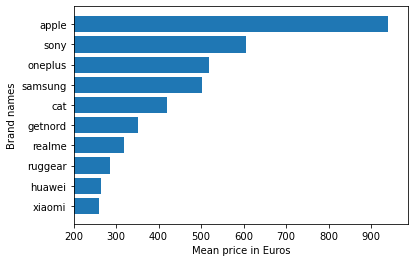

In [256]:
sgr_by_brand = gr_by_brand[:10].sort_values()
plt.barh(sgr_by_brand.keys(), sgr_by_brand)
plt.xlabel('Mean price in Euros')
plt.ylabel('Brand names')
plt.xticks(range(1000)[::100])
plt.xlim(xmin=200) 
plt.show()

Cheapest phones at this shop are:

In [124]:
gr_by_brand[-7:-1]

Brand
denver       102.47
prestigio     95.06
alcatel       83.99
prestigo      77.42
itel          65.00
evelatus      52.00
Name: Price, dtype: float64

### Question 3: Best rated phones and worse rated phones are?

Not all phones are rated, so firstly, another data separation is needed:

In [145]:
rated = df.drop(df[df.Rating == '-'].index, axis=0)

In [157]:
five_stared = rated[rated.Rating == 5]

In [159]:
print(f"There are {len(five_stared)} phones rated as 5/5")

There are 193 phones rated as 5/5


In [172]:
rated[rated.Rating < 2]

,Product_Name,Price,Rating,Color,Memory_GB,Brand
438,Apple iPhone 7 32GB,360,1,-,-,apple
664,Samsung Galaxy S10,-,1,-,128,samsung
